In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('class labels: ', np.unique(y))

class labels:  [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1, stratify=y)

In [4]:
print('labels counts in y: ', np.bincount(y))
print('labels counts in y_test: ', np.bincount(y_test))
print('labels counts in y_train: ', np.bincount(y_train))



labels counts in y:  [50 50 50]
labels counts in y_test:  [15 15 15]
labels counts in y_train:  [35 35 35]


In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

'''Using the preceding code, we loaded the StandardScaler class from the 
preprocessing module and initialized a new StandardScaler object that we 
assigned to the sc variable. Using the fit method, StandardScaler estimated the 
parameters μ (sample mean) and σ (standard deviation) for each feature dimension 
from the training data. By calling the transform method, we then standardized the 
training data using those estimated parameters μ and σ . Note that we used the 
same scaling parameters to standardize the test set so that both the values in the 
training and test datasets are comparable to each other.
'''



'Using the preceding code, we loaded the StandardScaler class from the \npreprocessing module and initialized a new StandardScaler object that we \nassigned to the sc variable. Using the fit method, StandardScaler estimated the \nparameters μ (sample mean) and σ (standard deviation) for each feature dimension \nfrom the training data. By calling the transform method, we then standardized the \ntraining data using those estimated parameters μ and σ . Note that we used the \nsame scaling parameters to standardize the test set so that both the values in the \ntraining and test datasets are comparable to each other.\n'

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter= 40, eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.01, max_iter=40, random_state=1)

In [7]:
y_pred = ppn.predict(X_test_std)

print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 2


In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy: %2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.955556


In [9]:
#Alternatively

print('Accuracy: %2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.955556


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X,y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max()+1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], 
                    alpha = 0.8, c=colors[idx], 
                    marker = markers[idx], label = cl, 
                    edgecolor='black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1], 
                    c='none', edgecolor='black', alpha = 1.0,
                    linewidth = 1, marker='o', 
                    s=100, label='test set')




C:\Users\Damwid\AppData\Local\Temp\ipykernel_12600\2206606922.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


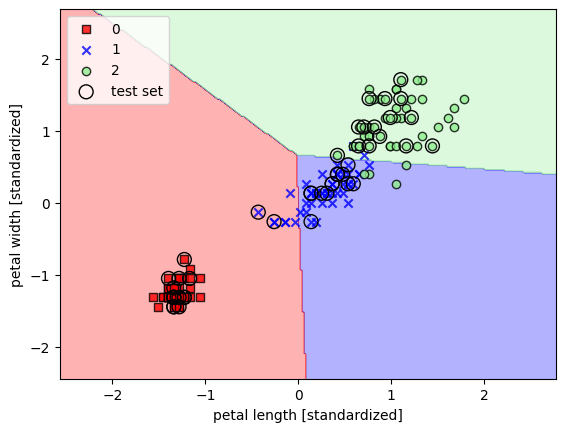

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show() 

C:\Users\Damwid\AppData\Local\Temp\ipykernel_12600\2206606922.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


<function matplotlib.pyplot.show(close=None, block=None)>

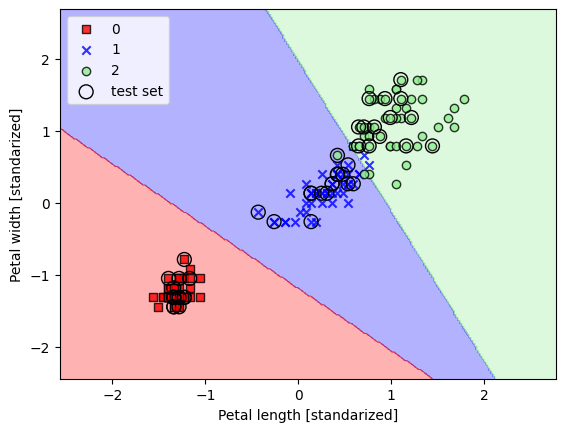

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standarized]')
plt.ylabel('Petal width [standarized]')
plt.legend(loc='upper left')
plt.show

In [25]:
lr.predict_proba(X_test_std[0,:].reshape(1,-1))


array([[1.41067213e-16, 8.80909742e-05, 9.99911909e-01]])

0.9999999999742002